In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('RCOM.csv')
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RCOM,EQ,15-May-2017,32.45,32.50,32.60,31.70,32.00,32.00,31.99,7126316,2.279973e+08,11883,1908042,26.77
1,RCOM,EQ,16-May-2017,32.00,32.05,32.35,31.85,32.00,32.10,32.12,7274881,2.336877e+08,9976,2211910,30.40
2,RCOM,EQ,17-May-2017,32.10,32.10,32.30,31.70,31.90,31.95,31.97,6245114,1.996360e+08,8838,1399815,22.41
3,RCOM,EQ,18-May-2017,31.95,31.60,31.90,31.00,31.05,31.05,31.34,11189938,3.506776e+08,17051,3629175,32.43
4,RCOM,EQ,19-May-2017,31.05,31.20,31.45,30.25,30.55,30.55,30.80,11898780,3.664547e+08,18065,3309529,27.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,RCOM,EQ,07-May-2019,2.00,2.00,2.10,2.00,2.10,2.10,2.06,64199212,1.325275e+08,9103,34677474,54.02
490,RCOM,EQ,08-May-2019,2.10,2.10,2.20,2.10,2.20,2.20,2.18,27455636,5.972756e+07,4208,14957834,54.48
491,RCOM,EQ,09-May-2019,2.20,2.30,2.30,2.30,2.30,2.30,2.30,7854126,1.806449e+07,2385,7711773,98.19
492,RCOM,EQ,10-May-2019,2.30,2.40,2.40,2.40,2.40,2.40,2.40,3584592,8.603021e+06,1560,3584592,100.00


In [3]:
def meanDailyReturn(df):
    return df['Close Price'].pct_change().dropna().mean()

def dailyStd(df):
    return df['Close Price'].pct_change().dropna().std()

def meanAnnualReturn(df):
    return meanDailyReturn(df) * 252

def annualStd(df):
    return dailyStd(df) * np.sqrt(252)

In [4]:
def print_returns(df):
    print('Company: ',df['Symbol'].iloc[1])
    print('Mean daily return: ',meanDailyReturn(df))
    print('Daily standard deviation: ',dailyStd(df))
    print('Mean annual return: ',meanAnnualReturn(df))
    print('Annual standard deviation: ',annualStd(df))

In [5]:
print_returns(df)

Company:  RCOM
Mean daily return:  -0.0034989231314716154
Daily standard deviation:  0.062072231904791365
Mean annual return:  -0.881728629130847
Annual standard deviation:  0.9853661336568424


In [6]:
df_maruti=pd.read_csv('Large_Cap/MARUTI.csv')
df_dhfl=pd.read_csv('Mid_Cap/DHFL.csv')
df_pvr=pd.read_csv('Small_Cap/PVR.csv')
df_cipla=pd.read_csv('Large_Cap/CIPLA.csv')

In [7]:
stocks=[df,df_maruti,df_cipla,df_dhfl,df_pvr]

for i in stocks:
    print_returns(i)
    print('-'*90)

Company:  RCOM
Mean daily return:  -0.0034989231314716154
Daily standard deviation:  0.062072231904791365
Mean annual return:  -0.881728629130847
Annual standard deviation:  0.9853661336568424
------------------------------------------------------------------------------------------
Company:  MARUTI
Mean daily return:  1.555889014371006e-05
Daily standard deviation:  0.014173824847112092
Mean annual return:  0.003920840316214935
Annual standard deviation:  0.22500249403228015
------------------------------------------------------------------------------------------
Company:  CIPLA
Mean daily return:  4.6701476775483235e-05
Daily standard deviation:  0.01599678237409395
Mean annual return:  0.011768772147421775
Annual standard deviation:  0.25394104763444403
------------------------------------------------------------------------------------------
Company:  DHFL
Mean daily return:  0.14798157178451057
Daily standard deviation:  0.8823733046668715
Mean annual return:  37.29135608969666
A

In [8]:
portfolio = pd.DataFrame()
for i in stocks:
    portfolio[ '{}'.format(i['Symbol'].iloc[1]) ] = i['Close Price']
portfolio.head()

,RCOM,MARUTI,CIPLA,DHFL,PVR
0,32.00,6823.90,569.00,431.4,1524.95
1,32.10,6953.95,565.60,1009.9,1539.00
2,31.95,6958.20,562.35,1055.2,1530.30
3,31.05,6831.05,560.10,1070.0,1515.05
4,30.55,6790.55,564.95,1050.0,1513.55


In [9]:
equal_weights = np.full( portfolio.shape[1], 1/portfolio.shape[1] )
equal_weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [10]:
def portfolio_annual_returns(portfolio, weights):
    return  np.sum(portfolio.pct_change().mean() * weights ) * 252

portfolio_annual_returns(portfolio, equal_weights)

5.422111848839529

In [11]:
portfolio_covariance = portfolio.pct_change().cov()
portfolio_covariance

,RCOM,MARUTI,CIPLA,DHFL,PVR
RCOM,0.003853,0.000026,0.000145,0.000105,0.000101
MARUTI,0.000026,0.000201,0.000026,-0.000138,0.000071
CIPLA,0.000145,0.000026,0.000256,0.000173,0.000033
DHFL,0.000105,-0.000138,0.000173,0.281615,0.000304
PVR,0.000101,0.000071,0.000033,0.000304,0.000382


In [12]:
def portfolio_annual_volatility( portfolio, weights ): 
    return np.sqrt(
        np.dot( 
            weights.T, 
            np.dot( portfolio_covariance, weights )
        ) * np.sqrt(252)
    )

portfolio_annual_volatility(portfolio, equal_weights)

0.42763610394912294

In [13]:
def portfolio_sharpe( portfolio, weights ): 
    return portfolio_annual_returns( portfolio, weights ) / portfolio_annual_volatility( portfolio, weights )

portfolio_sharpe(portfolio, equal_weights)


12.679265849556549

In [14]:
def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio.shape[1])
    return normalize_weights( weights )

random_weights()

array([0.25 , 0.223, 0.294, 0.188, 0.045])

In [15]:
scatter_data = pd.DataFrame()
for i in range(0, 2500):
    weights    = random_weights()
    returns    = portfolio_annual_returns(    portfolio, weights )
    volatility = portfolio_annual_volatility( portfolio, weights )
    sharpe     = returns / volatility
    scatter_data = scatter_data.append([{
        "weights":    weights,
        "returns":    returns,
        "volatility": volatility,
        "sharpe":     sharpe
    }])

scatter_data.reset_index(inplace=True, drop=True)
scatter_data.head()

,weights,returns,volatility,sharpe
0,"[0.28571428571428564, 0.014985014985014982, 0....",2.674355,0.235457,11.358122
1,"[0.148, 0.188, 0.162, 0.265, 0.237]",7.281373,0.563032,12.932424
2,"[0.134, 0.158, 0.144, 0.186, 0.378]",5.108043,0.397552,12.848755
3,"[0.02302302302302302, 0.35535535535535534, 0.3...",3.213502,0.246752,13.023200
4,"[0.04, 0.397, 0.05, 0.171, 0.342]",4.769616,0.364395,13.089126


In [16]:
point_max_sharpe     = scatter_data.loc[ scatter_data['sharpe'].idxmax()     ]
point_max_sharpe

weights       [0.001, 0.271, 0.079, 0.252, 0.397]
returns                                    7.0653
volatility                               0.534957
sharpe                                    13.2072
Name: 516, dtype: object

In [17]:
point_min_volatility = scatter_data.loc[ scatter_data['volatility'].idxmin() ]
point_min_volatility

weights       [0.008, 0.448, 0.394, 0.001, 0.149]
returns                                 0.0501945
volatility                              0.0423648
sharpe                                    1.18482
Name: 1393, dtype: object

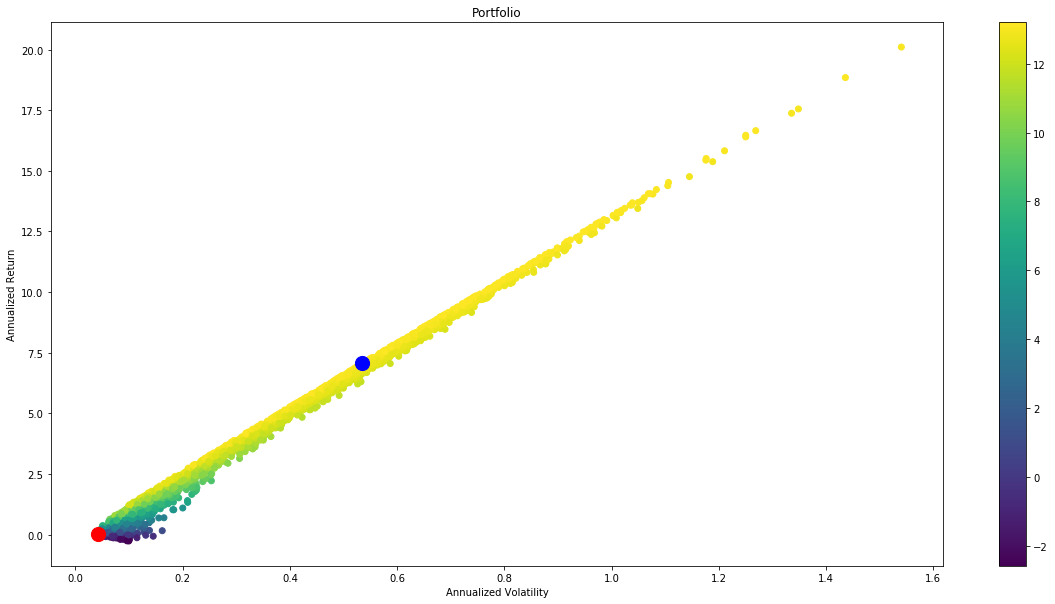

In [18]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=1)
plt.scatter( 
    scatter_data.volatility,     
    scatter_data.returns, 
    c = scatter_data.sharpe
)
plt.title('Portfolio')
plt.ylabel('Annualized Return')
plt.xlabel('Annualized Volatility')
plt.colorbar()

# Mark the 2 portfolios where
plt.scatter( point_max_sharpe.volatility,     point_max_sharpe.returns, c='b',s=200)
plt.scatter( point_min_volatility.volatility, point_min_volatility.returns, c='r',s=200)